In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
with open('C:/Users/HP/Desktop/DS/udemy/DL and ML Practical Tutorials - Package/Project 5/traffic-signs-data/train.p', mode = 'rb') as training_data:
    train = pickle.load(training_data)
with open('C:/Users/HP/Desktop/DS/udemy/DL and ML Practical Tutorials - Package/Project 5/traffic-signs-data/valid.p', mode = 'rb') as validation_data:
    valid = pickle.load(validation_data)
with open('C:/Users/HP/Desktop/DS/udemy/DL and ML Practical Tutorials - Package/Project 5/traffic-signs-data/test.p', mode = 'rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train , y_train = train['features'],train['labels']
X_validation , y_validation = valid['features'],valid['labels']
X_test , y_test = test['features'],test['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

In [6]:
X_validation.shape

(4410, 32, 32, 3)

In [7]:
y_validation.shape

(4410,)

In [8]:
X_test.shape

(12630, 32, 32, 3)

In [9]:
y_test.shape

(12630,)

37

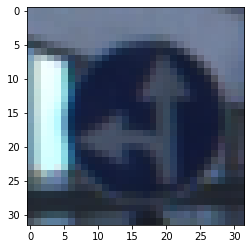

In [10]:
i = 5000
plt.imshow(X_train[i])
y_train[i]

1

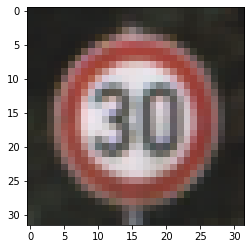

In [11]:
i = 500
plt.imshow(X_validation[i])
y_validation[i]

### Data preparation

In [12]:
from sklearn.utils import shuffle

In [13]:
X_train,y_train =shuffle(X_train,y_train)

In [14]:
X_train_gray = np.sum(X_train/3 ,axis = 3 , keepdims = True )
X_validation_gray = np.sum(X_validation/3 ,axis = 3 , keepdims = True )
X_test_gray = np.sum(X_test/3 ,axis = 3 , keepdims = True )

In [15]:
X_train_gray.shape

(34799, 32, 32, 1)

In [16]:
X_test_gray.shape

(12630, 32, 32, 1)

In [17]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [18]:
X_train_gray_nrom = (X_train_gray-128)/128
X_validation_gray_nrom = (X_validation_gray-128)/128
X_test_gray_nrom = (X_test_gray-128)/128

In [19]:
X_train_gray_nrom

array([[[[-0.63020833],
         [-0.59895833],
         [-0.60416667],
         ...,
         [-0.703125  ],
         [-0.70572917],
         [-0.72395833]],

        [[-0.69010417],
         [-0.66927083],
         [-0.65104167],
         ...,
         [-0.6875    ],
         [-0.70052083],
         [-0.71354167]],

        [[-0.71875   ],
         [-0.7109375 ],
         [-0.6953125 ],
         ...,
         [-0.66145833],
         [-0.68489583],
         [-0.703125  ]],

        ...,

        [[-0.70572917],
         [-0.7578125 ],
         [-0.78645833],
         ...,
         [-0.55989583],
         [-0.6640625 ],
         [-0.6875    ]],

        [[-0.6953125 ],
         [-0.73958333],
         [-0.78125   ],
         ...,
         [-0.5625    ],
         [-0.68229167],
         [-0.69791667]],

        [[-0.72395833],
         [-0.7109375 ],
         [-0.75      ],
         ...,
         [-0.55208333],
         [-0.66927083],
         [-0.703125  ]]],


       [[[-0.84635417],


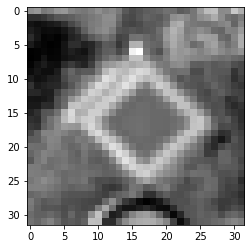

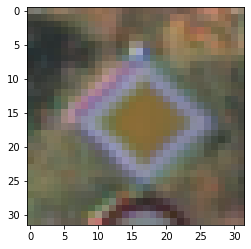

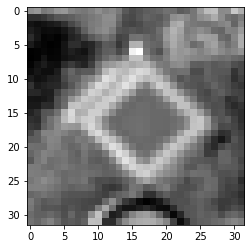

In [20]:
i = 600
plt.imshow(X_train_gray[i].squeeze() , cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_nrom[i].squeeze(),cmap = 'gray')

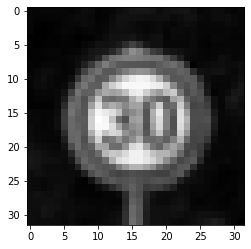

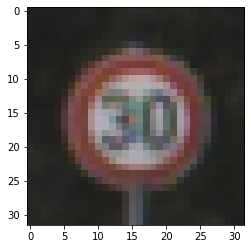

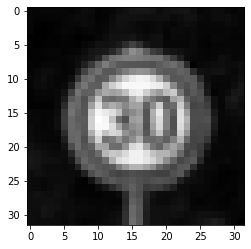

In [21]:
i = 489
plt.imshow(X_validation_gray[i].squeeze() , cmap = 'gray')
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray_nrom[i].squeeze(),cmap = 'gray')

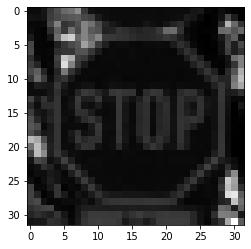

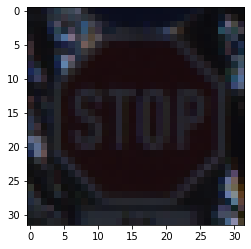

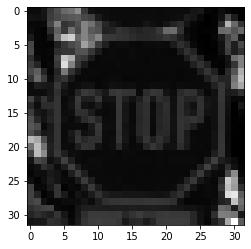

In [22]:
i = 666
plt.imshow(X_test_gray[i].squeeze() , cmap = 'gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_nrom[i].squeeze(),cmap = 'gray')

### Model Training

- First Convolutional layer
 - input = 32x32x1
 - output = 28x28x6
 - output = (input-filter+1)/strides => (32-5+1)/1 = 28
 - used a 5x5 filter with imput depth of 3 and output depth of 6
 - apply  RELU activation function to the out put
 - pooling for input , input =  28x28x6 and output  = 14x14x6

stride is the amount by which the kernel is  shifted  when the kernel is passed over the image

 - Second Concolutional layer
    - input = 14x14x6
    - output = 10x10x6
    - output = (input-filter+1)/strides =>10 =  (14-5+1)/1
    - RELU activation function to the output
    - Pooling with input = 10x10x16 and output = 5x5x16
    


- Flattening the network
 - Flatten the network with input = 5x5x16 and output = 400
- Full connected layer
 - Layer 3: Full connected layer with input = 400 and output = 120
 - Apply RELU to the output
- Another fully connected layer
 - Layer 4: Another fully connected layer with input = 120 and output = 84
 - Apply RELU to the output
- Fully connected layer 
 - Layer 5: Fully connected layer with input = 84 and output = 43 

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D , AveragePooling2D , Dense , Flatten ,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [24]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=6 , kernel_size = (8,8),activation = 'relu' , input_shape = (32,32,1)))
cnn_model.add(MaxPooling2D())

cnn_model.add(Conv2D(filters=16 , kernel_size = (8,8),activation = 'relu'))
cnn_model.add(MaxPooling2D())
              
cnn_model.add(Flatten())

cnn_model.add(Dense(units = 200 , activation = 'relu'))
cnn_model.add(Dense(units = 100, activation = 'relu'))
cnn_model.add(Dense(units = 75, activation = 'softmax'))

In [25]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy' , optimizer = Adam(lr = 0.001), metrics = ['accuracy'])

In [26]:
history = cnn_model.fit(X_train_gray_nrom,
             y_train,
             batch_size = 500,
             nb_epoch = 50,
             verbose = 1,
             validation_data = (X_validation_gray_nrom, y_validation))

C:\Users\HP\Anaconda3\envs\omEnv\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 19s 539us/step - loss: 3.4532 - accuracy: 0.1251 - val_loss: 3.0098 - val_accuracy: 0.2381
Epoch 2/50
34799/34799 [==============================] - 17s 484us/step - loss: 2.0072 - accuracy: 0.4561 - val_loss: 1.5529 - val_accuracy: 0.5599
Epoch 3/50
34799/34799 [==============================] - 16s 472us/step - loss: 1.0317 - accuracy: 0.7179 - val_loss: 0.9796 - val_accuracy: 0.7129
Epoch 4/50
34799/34799 [==============================] - 16s 470us/step - loss: 0.6704 - accuracy: 0.8249 - val_loss: 0.7595 - val_accuracy: 0.7646
Epoch 5/50
34799/34799 [==============================] - 16s 465us/step - loss: 0.4964 - accuracy: 0.8693 - val_loss: 0.6618 - val_accuracy: 0.8125
Epoch 6/50
34799/34799 [==============================] - 16s 471us/step - loss: 0.3952 - accuracy: 0.8970 - val_loss: 0.5707 - val_accuracy: 0.8342
Epoch 7/50
34799/34799 [==============================] -

### Model Evaluation

In [27]:
score = cnn_model.evaluate(X_test_gray_nrom ,y_test)
print('Test accuracy :{}'.format(score[1]))

12630/12630 [==============================] - 4s 335us/step
Test accuracy :0.9046714305877686


In [28]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [29]:
accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss= history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

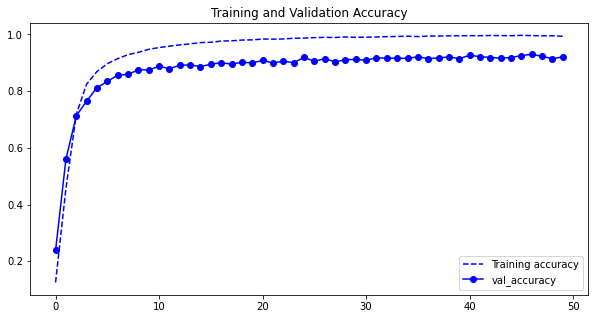

In [30]:
plt.figure(figsize =(10,5)) 
epochs = range(len(accuracy))
plt.plot(epochs , accuracy ,'b--' , label='Training accuracy')
plt.plot(epochs , val_accuracy ,'bo-' , label='val_accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Loss and Validation Loss')

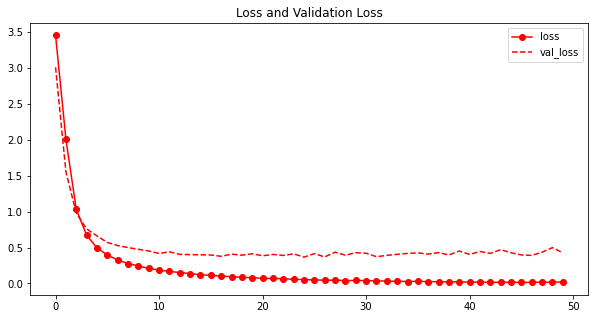

In [31]:
plt.figure(figsize =(10,5)) 
epochs = range(len(loss))
plt.plot(epochs , loss ,'ro-' , label='loss')
plt.plot(epochs , val_loss ,'r--' , label='val_loss')
plt.legend()
plt.title('Loss and Validation Loss')

In [32]:
predicted_classes = cnn_model.predict_classes(X_test_gray_nrom)
y_true = y_test

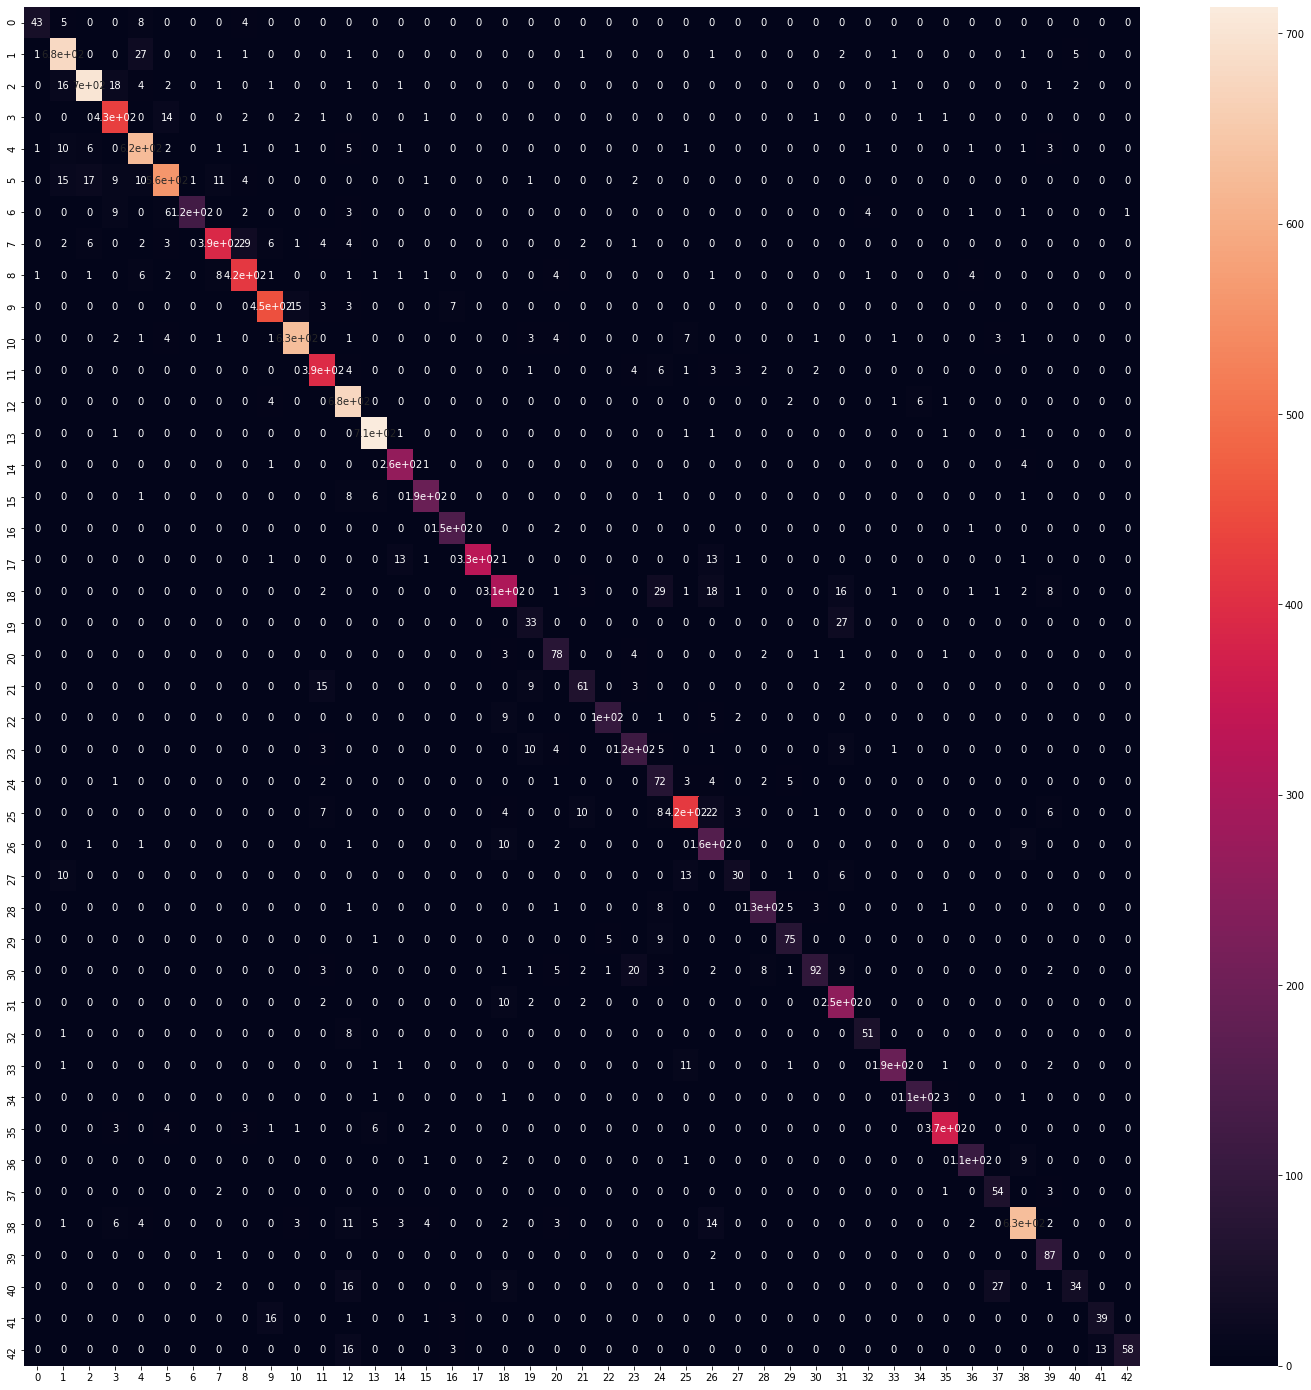

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true , predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot = True)

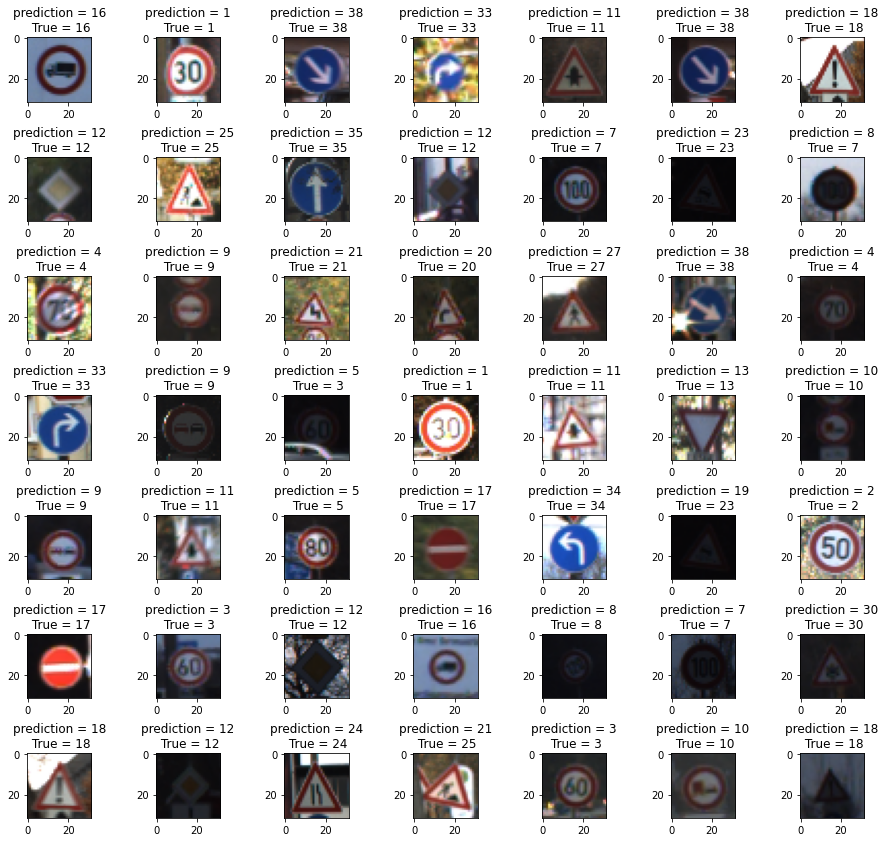

In [34]:
l =7
w =7

fig ,axes = plt.subplots(l,w , figsize =(15,15))
axes = axes.ravel()
for i in np.arange(0,l*w):
    axes[i].imshow(X_test[i])
    axes[i].set_title('prediction = {}\n True = {}'.format(predicted_classes[i],y_true[i]))
plt.subplots_adjust(wspace = 1) #increase the space between images